In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('cancer/data.csv')

In [54]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
print(data.columns)
print(data.shape)

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')
(569, 33)


In [56]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
original = data
data = data.drop(data.columns[32],axis=1)
print(data.shape)

(569, 32)


In [58]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [59]:
label = data.diagnosis
print(label.head)
print(label.shape)
data = data.drop(['id','diagnosis'],axis=1)
x = data
print(data.shape)

<bound method Series.head of 0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>
(569,)
(569, 30)


In [60]:
diagnosis_B = len(original[original.diagnosis=='B'])
diagnosis_M = len(original[original.diagnosis=='M'])
print(diagnosis_B)
print(diagnosis_M)

357
212


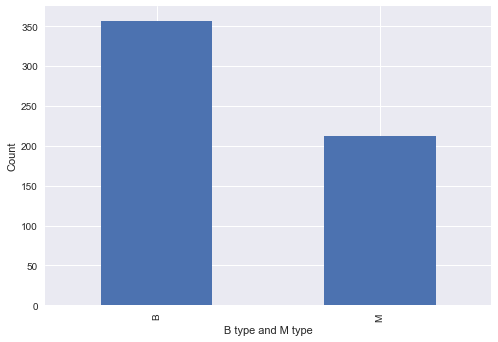

In [61]:
original['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('B type and M type')
plt.ylabel('Count')
plt.show()

In [62]:
original.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [63]:
print(data.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.0787

In [64]:
data_n_3 = (data - data.mean()) / (data.std())
print(data_n_3.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean           ...             radius_worst  \
0                2.25376

In [65]:
data_n_4 = data_n_3.iloc[:,0:10]
print(data_n_4.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean  
0                2.253764  
1               -0.867889  
2       

In [66]:
data_n_5 = pd.concat([label,data_n_3.iloc[:,0:10]],axis=1)
print(data_n_5.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.096100     -2.071512        1.268817   0.983510   
1         M     1.828212     -0.353322        1.684473   1.907030   
2         M     1.578499      0.455786        1.565126   1.557513   
3         M    -0.768233      0.253509       -0.592166  -0.763792   
4         M     1.748758     -1.150804        1.775011   1.824624   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.567087          3.280628        2.650542             2.530249   
1        -0.826235         -0.486643       -0.023825             0.547662   
2         0.941382          1.052000        1.362280             2.035440   
3         3.280667          3.399917        1.914213             1.450431   
4         0.280125          0.538866        1.369806             1.427237   

   symmetry_mean  fractal_dimension_mean  
0       2.215566                2.253764  
1       0.001391               -0.86

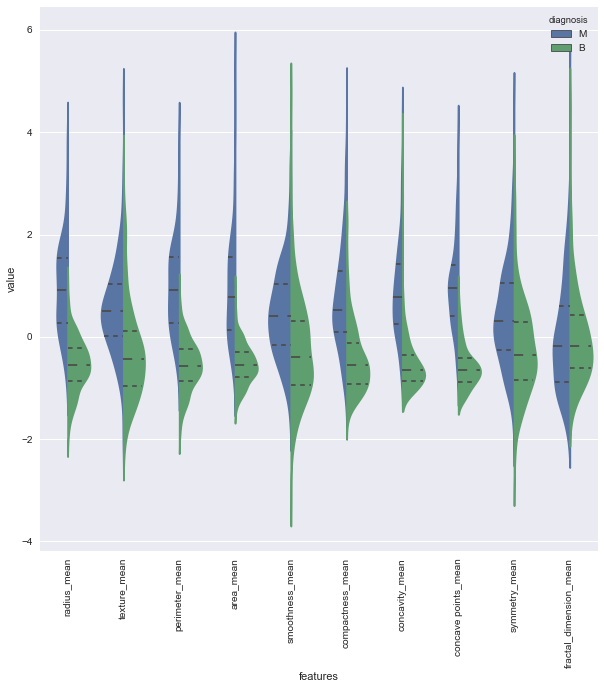

In [67]:
# first ten features
data_dia = label
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([label,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

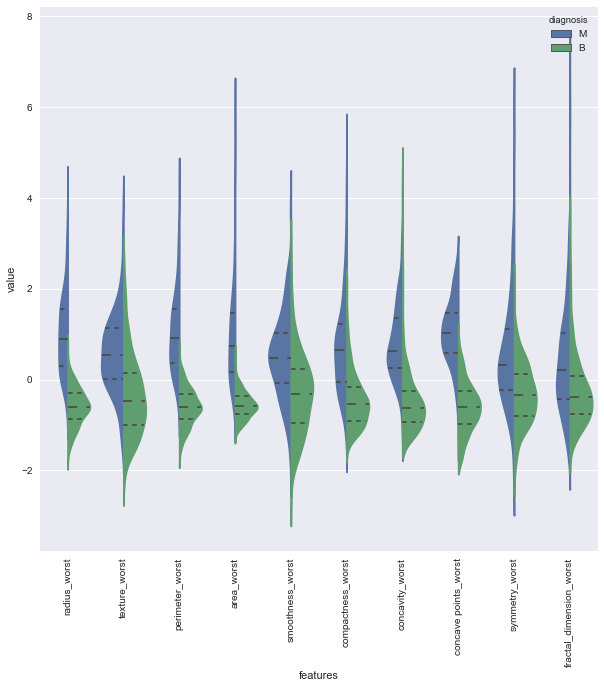

In [68]:
# Second ten features
data = pd.concat([label,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

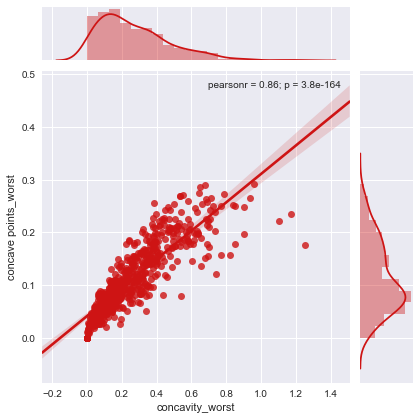

In [71]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
plt.show()

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


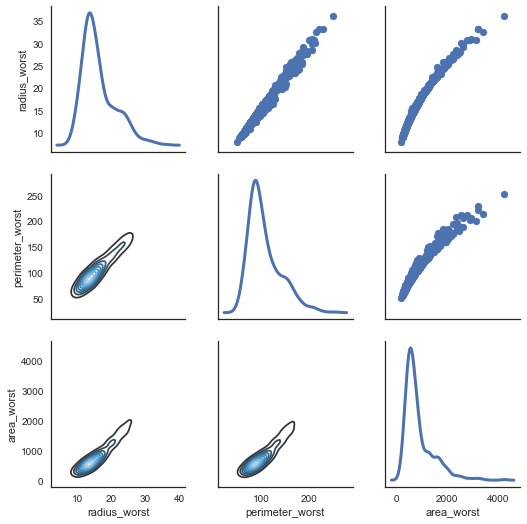

In [72]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

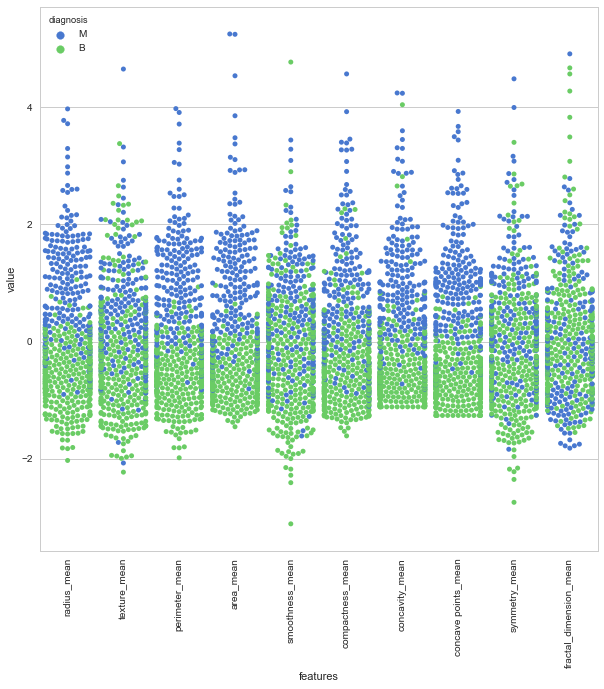

In [75]:
sns.set(style="whitegrid", palette="muted")
data_dia = label
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([label,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

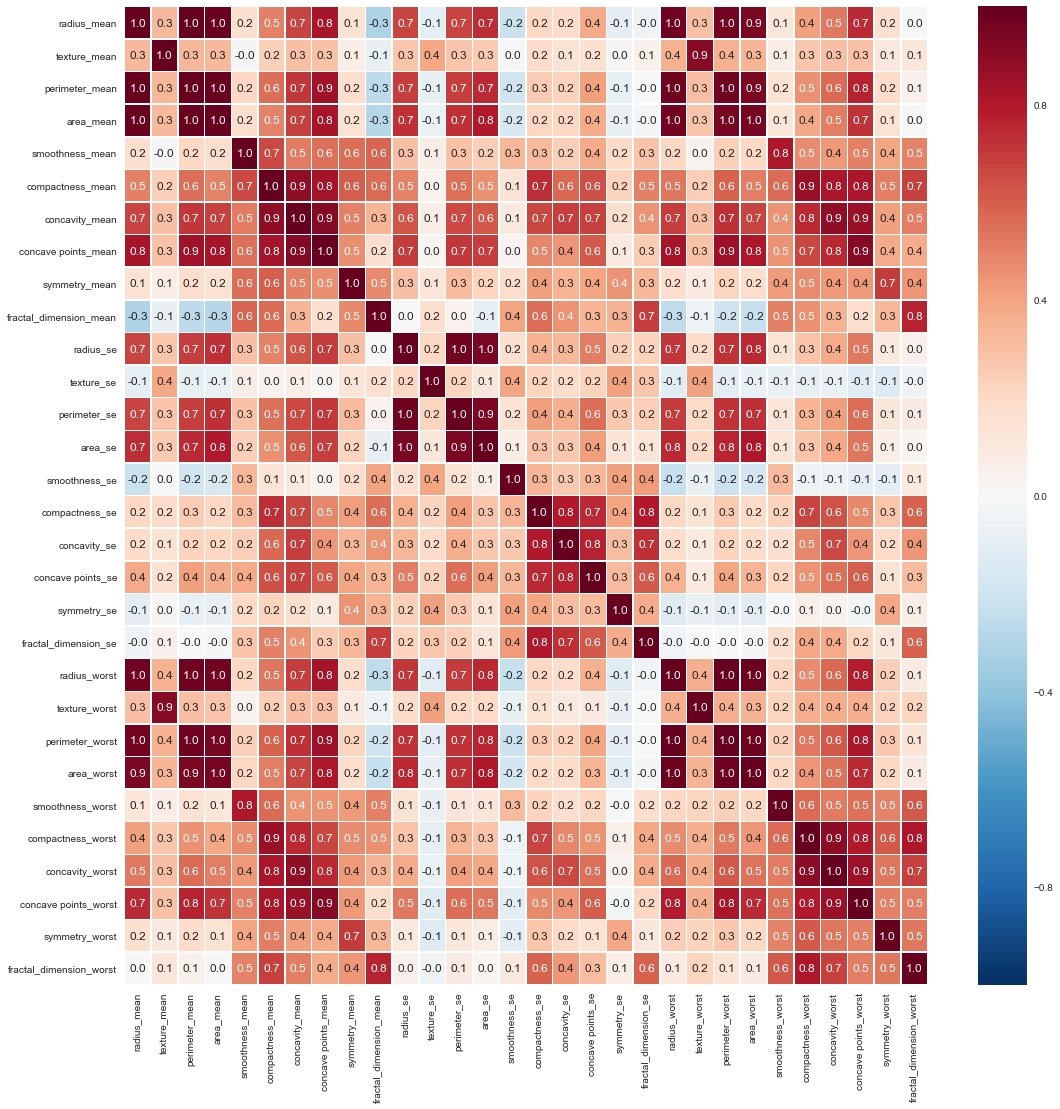

In [78]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [79]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
print(x_1.head())

   texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  

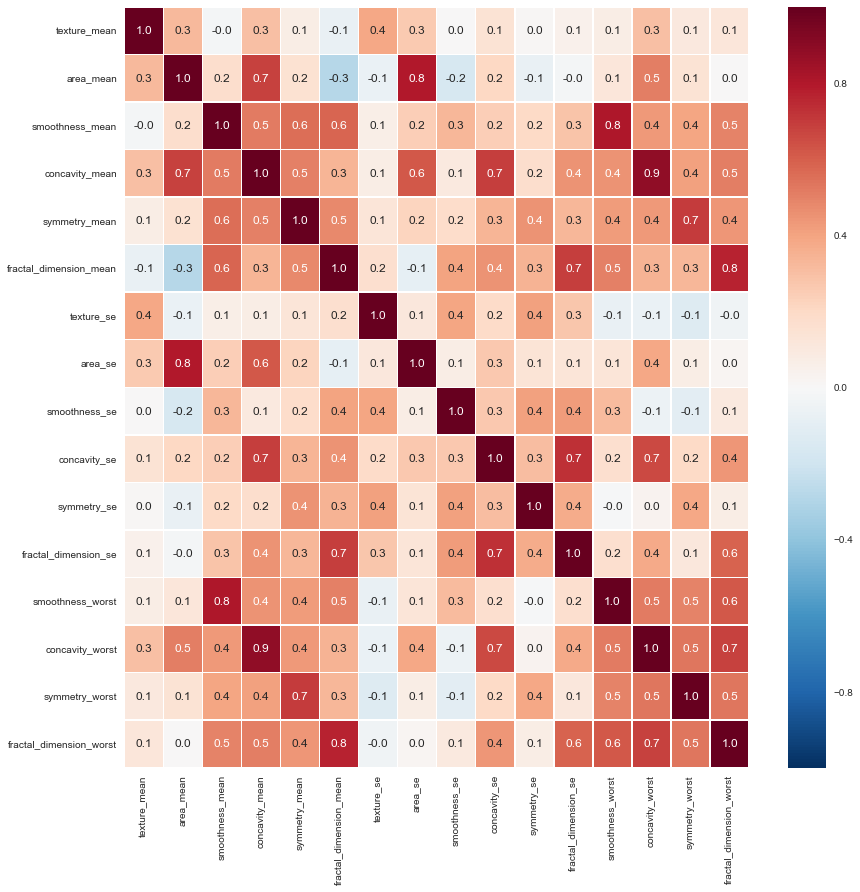

In [82]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

('Accuracy is: ', 0.95321637426900585)


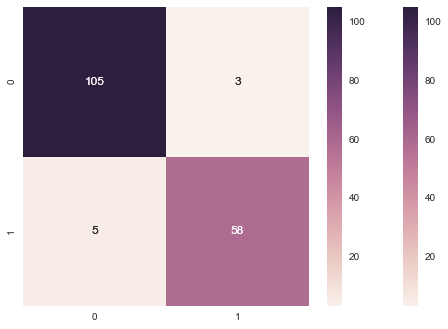

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, label, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

('Score list:', array([  6.06916433e+01,   3.66899557e+04,   1.00015175e-01,
         1.30547650e+01,   1.95982847e-01,   3.42575072e-04,
         4.07131026e-02,   6.12741067e+03,   1.32470372e-03,
         6.92896719e-01,   1.39557806e-03,   2.65927071e-03,
         2.63226314e-01,   2.58858117e+01,   1.00635138e+00,
         1.23087347e-01]))
('Feature list:', Index([u'texture_mean', u'area_mean', u'smoothness_mean', u'concavity_mean',
       u'symmetry_mean', u'fractal_dimension_mean', u'texture_se', u'area_se',
       u'smoothness_se', u'concavity_se', u'symmetry_se',
       u'fractal_dimension_se', u'smoothness_worst', u'concavity_worst',
       u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object'))


('Accuracy is: ', 0.94736842105263153)


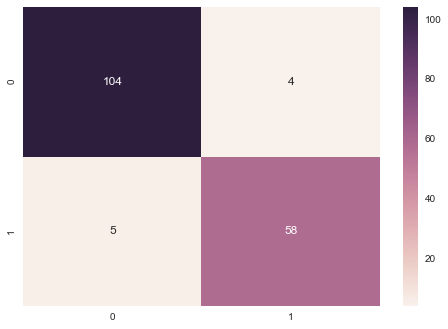

In [87]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

In [88]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

('Chosen best 5 feature by rfe:', Index([u'area_mean', u'concavity_mean', u'area_se', u'concavity_worst',
       u'symmetry_worst'],
      dtype='object'))


In [89]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

('Optimal number of features :', 11)
('Best features :', Index([u'texture_mean', u'area_mean', u'concavity_mean',
       u'fractal_dimension_mean', u'area_se', u'concavity_se',
       u'fractal_dimension_se', u'smoothness_worst', u'concavity_worst',
       u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object'))


Feature ranking:
1. feature 7 (0.278501)
2. feature 1 (0.179332)
3. feature 13 (0.141325)
4. feature 3 (0.131333)
5. feature 14 (0.090187)
6. feature 0 (0.037443)
7. feature 8 (0.028262)
8. feature 12 (0.021663)
9. feature 9 (0.020292)
10. feature 2 (0.019743)
11. feature 11 (0.015016)
12. feature 15 (0.011882)
13. feature 10 (0.010376)
14. feature 4 (0.009807)
15. feature 6 (0.003145)
16. feature 5 (0.001692)


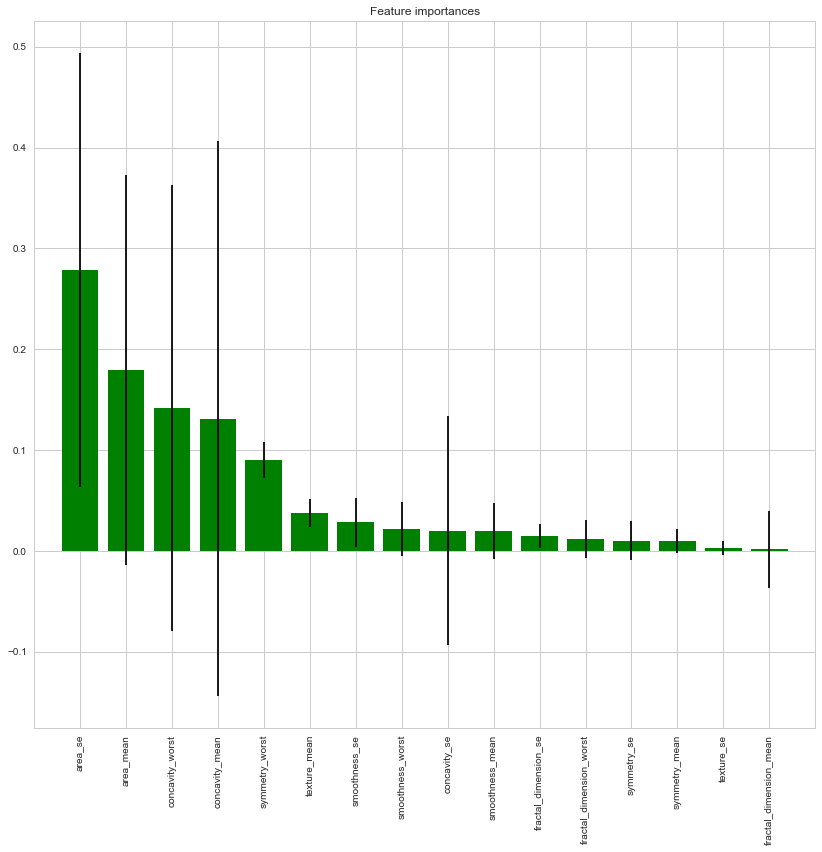

In [90]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

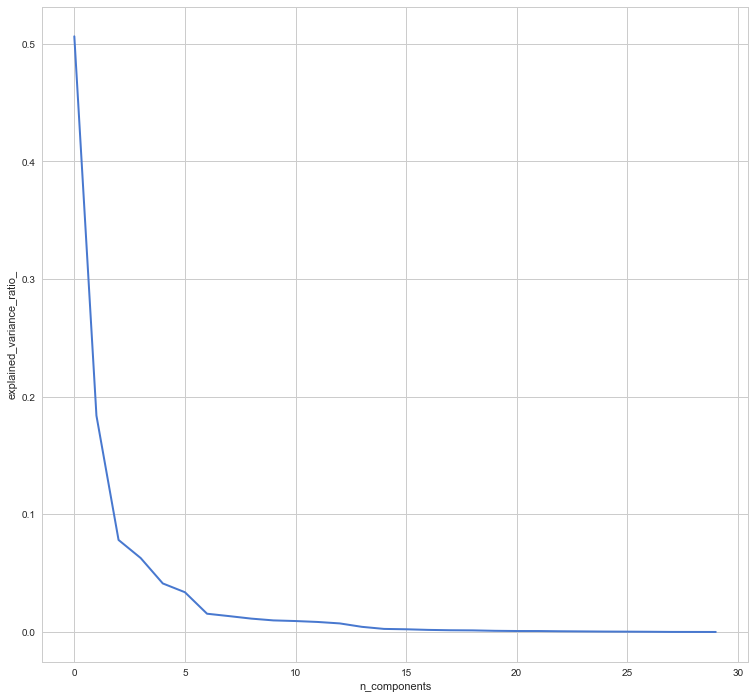

In [93]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
